The RetroTide repository comprises of two key packages - `bcs` and `retrotide`. The `bcs` package comprises key PKS domains (e.g. AT, DH, ER, KR) and their corresponding reaction rules, writted as SMARTS templates with RDKit. These domains can then be concatenated together to form modules, which can in turn be concatenated together to form a chimeric type I PKS. Meanwhile, `retrotide` calls upon `bcs` to combinatorially explore the design space of chimeric type I PKSs with the objective of synthesizing a target molecule, or at least, its required carbon scaffold.

The introduction presented here is specifically for `bcs` rather than `retrotide`. Consequently, in building various PKS designs here, we specify the various starter and extender units as well as the domain architectures within a module. When using `retrotide`, however, we only need to provide a target molecule as the input, after which `retrotide` will recursively decide on the optimal choice of starters, extenders, and domain architectures to use in order to automatically design chimeric PKSs that produce molecules which are chemically similar to the specified target.

In [16]:
from retrotide import retrotide, structureDB

In [17]:
import bcs

We can instantiate various type I PKS domains using any of the following domain classes from the `bcs` package: `bcs.AT` (acyltransferase), `bcs.KR` (ketoreductase), `bcs.DH` (dehydratase), `ER` (enoylreductase), and `bcs.TE` (thioesterase). For each module, the ketosynthase and acyl-carrier protein domains are assumed to be implicitly present.

#### Creating a loading module

In order to create a loading module, we only need a `bcs.AT` domain. We also need to specify which `substrate` is being used and if this is module is a loading module or not (by setting `loading = True` or `loading = False`. The full list of starter units that can be used within a loading module can be found in `../bcs/data/starters.smi`. 

Once a `bcs.AT` domain object has been instantiated, we can create a loading module by passing this `bcs.AT` domain as an argument into the `bcs.Module` class to instantiate an object of the `bcs.Module` class.

In [18]:
### Build a loading module with acetyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)

With this loading module, we can now instantiate an object of the `bcs.Cluster` class. The `bcs.Cluster` class takes in a list of modules as its input so while we are only building a PKS with a loading module here, we will add more extension modules later on and these can also be passed in within the input list of modules to build bigger and bigger PKSs.

In [19]:
cluster = bcs.Cluster(modules = [loading_module])

Finally, we can visualize the product from this PKS cluster with a loading module that loads Acetyl-CoA as its starter unit by calling on the `.computeProduct` method for the `bcs.Cluster` class. This `.computeProduct` returns an RDKit `Chem.rdchem.Mol` object.

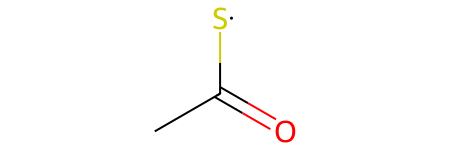

In [20]:
mol = cluster.computeProduct(structureDB)
mol

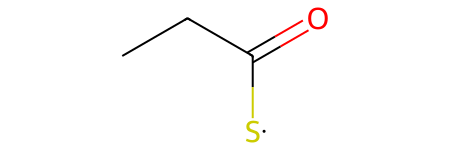

In [21]:
### Build a loading module with propionyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "prop")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

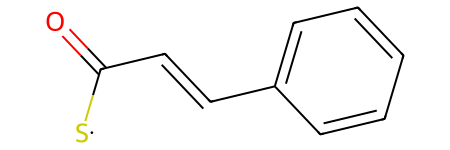

In [22]:
### Build a loading module with cinnamoyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "cin")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

Notice that for the products of each of the loading modules above, there is a sulfur radical attached to the carbonyl carbon atom that is carrying a ketone group. This sulfur radical represents the bond to the acyl-carrier protein in each module. 

#### Adding the first extension module to a loading module

In [84]:
### Loading module
at_domain = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module_at = bcs.Module(domains = {bcs.AT: at_domain}, loading = True)

### Module 1
at_domain = bcs.AT(active = True, substrate = "Malonyl-CoA")
kr_domain = bcs.KR(active = True, type = "B")
dh_domain = bcs.DH(active = True)
er_domain = bcs.ER(active = True)
module1_AT_KR = bcs.Module(domains = {bcs.AT: at_domain, 
                                      bcs.KR: kr_domain,
                                      bcs.DH: dh_domain,
                                      bcs.ER: er_domain}, loading = False)

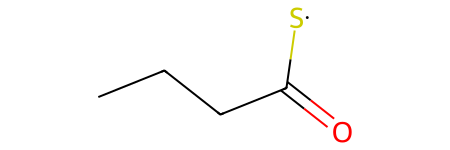

In [85]:
cluster = bcs.Cluster(modules = [loading_module_at, module1_AT_KR])
cluster.computeProduct(structureDB)

In [52]:
loading_module_domains = {"AT": bcs.AT(active=True, substrate = 'Methylmalonyl-CoA')}

In [53]:
loading_module = bcs.Module(loading_module_domains, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
cluster.computeProduct(structureDB)

KeyError: <class 'bcs.bcs.AT'>

In [54]:
cluster.domains

AttributeError: 'Cluster' object has no attribute 'domains'

In [55]:
starters

NameError: name 'starters' is not defined

In [27]:
structureDB

{["AT{'substrate': 'butmal'}", 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14821fcf0>,
 ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14822a120>,
 ["AT{'substrate': 'mxmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14822a190>,
 ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14822a350>,
 ["AT{'substrate': 'allylmal'}", 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14821fc80>,
 ["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14822a270>,
 ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14822a200>,
 ["AT{'substrate': 'mxmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']: <rdkit.Chem.rdchem.Mol at 0x14822a510>,
 ["AT{'substrate': 'isobutmal'}", "KR{'type': 'B1'}", 'loading: False']: <rdkit.Chem.rdchem.Mol a